### CASE STUDY

#### STEP-1: IMPORTING DATA SET AND NECESSARY LIBRARIES

In [1]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

%matplotlib inline

In [3]:
#Reading dataset
lead = pd.read_csv(r"C:\Users\SIBIL\Downloads\Assignment\Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead.shape

(9240, 37)

In [5]:
lead.describe

<bound method NDFrame.describe of                                Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Dire

In [6]:
lead.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

#### Step 2: Data Cleaning and Manipulation

In [7]:
#Checking Missing values on the data set:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
#checking percentage of Null values:
missed_percent = lead.isnull().sum()/len(lead)*100
missed_percent

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
#Making the boxes where select option to null:
lead =lead.replace('Select',np.nan)

In [10]:
#Checking percentage of missing values:-
missed_percent = lead.isnull().sum()/len(lead)*100
missed_percent

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
#Checking all columns that has more than 40% missing values:
#columns with null values more than 45%:
x = missed_percent[missed_percent>=40]
x.sort_values(ascending = False, inplace = True)
x

How did you hear about X Education    78.463203
Lead Profile                          74.188312
Lead Quality                          51.590909
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

In [12]:
#Dropping all columns where null values more than 40%:
for i in x.index:
    lead.drop(i, axis=1, inplace = True)

In [13]:
missed_percent = lead.isnull().sum()/len(lead)*100
missed_percent.sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

In [14]:
#Checking columns with other missing values:-
#City:
lead["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [15]:
#Imputing Mumbai on null values:
lead['City']=lead['City'].replace(np.nan,'Mumbai')

In [16]:
#Specialization:
lead["Specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [17]:
#Checking Null values and updating it with "Not Specified":
lead['Specialization']=lead['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management',
                                                 'IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management',
                                                 'Retail Management'],'Management_Specializations')
lead['Specialization'] =lead['Specialization'].replace(np.nan,'Not_specified')

In [18]:
#Tags:
lead["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [19]:
lead['Tags']=lead['Tags'].replace(['switched off','Busy','Lost to EINS','Not doing further education','Interested  in full time MBA'
                              ,'Graduation in progress','invalid number','Diploma holder (Not Eligible','wrong number given','opp hangup'
                              ,'number not provided','in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month',
                              'University not recognized','Recognition issue (DEC approval)','Diploma holder (Not Eligible)'],'Others')

In [20]:
lead['Tags']=lead['Tags'].replace(np.nan,'Not Specified')

In [21]:
#Imputing all other reasons to not specified:
lead["Tags"].value_counts()

Not Specified                          3353
Will revert after reading the email    2072
Others                                 1276
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Name: Tags, dtype: int64

In [22]:
#What is your current occupation:
lead["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [23]:
lead['What is your current occupation']=lead['What is your current occupation'].replace(['Housewife','Businessman','Other'],'Others')

In [24]:
#Imputing Columns with null values to most occured profession:
lead['What is your current occupation'] =lead['What is your current occupation'].replace(np.nan,'Unemployed')


In [25]:
lead["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [26]:
lead["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [27]:
#Dropping both variables as they are not useful in our analysis:
lead.drop(['Country', "What matters most to you in choosing a course"], axis = 1, inplace = True)

In [28]:
missed_percent = lead.isnull().sum()/len(lead)*100
missed_percent.sort_values(ascending = False)

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Prospect ID                                 0.000000
X Education Forums                          0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
City                                        0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Tags                                        0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
Lead Number                                 0.

In [29]:
#Total Visits:
lead["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [30]:
#CHecking Median:
lead.TotalVisits.median()

3.0

In [31]:
# imputing the null values in TotalVisits by the median value 3.0
lead['TotalVisits'] = lead['TotalVisits'].replace(np.nan, lead['TotalVisits'].median())

In [32]:
#Page Views Per Visit                        
lead["Page Views Per Visit"].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [33]:
lead["Page Views Per Visit"].median()

2.0

In [34]:
## imputing the null values in Page Views per visit by the median value 3.0:lead['TotalVisits'] = lead['TotalVisits'].replace(np.nan, lead['TotalVisits'].median())
lead['Page Views Per Visit'] = lead['Page Views Per Visit'].replace(np.nan, lead['Page Views Per Visit'].median())

In [35]:
#Last Activity                               
lead["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [36]:
#Replacing all values with most occured value:
lead['Last Activity']=lead['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked',
                            'Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Others')

In [37]:
lead['Last Activity'] =lead['Last Activity'].replace(np.nan,'Email Opened')


In [38]:
#Lead Source                                 
lead["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [39]:
#Replacing null values with the most occured value:
lead['Lead Source'] =lead['Lead Source'].replace(np.nan,'Google')
lead['Lead Source']=lead['Lead Source'].replace('google','Google')
lead['Lead Source']=lead['Lead Source'].replace(['Facebook','youtubechannel'],'Social Media ')
lead['Lead Source']=lead['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat','testone','Pay per Click Ads',
                                             'welearnblog_Home','WeLearn','blog','NC_EDM'],'Others')

In [40]:
#Checking if we left any null values:
percent_miss = lead.isnull().sum()/len(lead)*100
percent_miss.sort_values(ascending = False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website             

In [41]:
list_lead=['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums',
     'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
    'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
    ,'A free copy of Mastering The Interview']

for i in list_lead:
    print(lead[i].value_counts())

No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
No     9226
Yes      14
Name: Search, dtype: int64
No    9240
Name: Magazine, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No     9239
Yes       1
Name: X Education Forums, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
No    9240
Name: Update me on Supply Chain Content, dtype: int64
No    9240
Name: Get updates on DM Content, dtype: int64
No    9240
Name: I agree to pay the amount through cheque, dtype: int64
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


In [42]:
#dropping columns which have only value no and it will be of no use for analysis
lead=lead.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement'
           ,'Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'Do Not Email','Last Notable Activity'],axis=1)

In [43]:
lead.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
Tags                                       object
City                                       object
A free copy of Mastering The Interview     object
dtype: object

#### STEP-3: CHECKING OUTLIERS

In [44]:
lead.describe(percentiles = [0.01,0.05,.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
1%,580317.120000,0.000000,0.000000,0.000000,0.000000
5%,582869.900000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000


<Axes: >

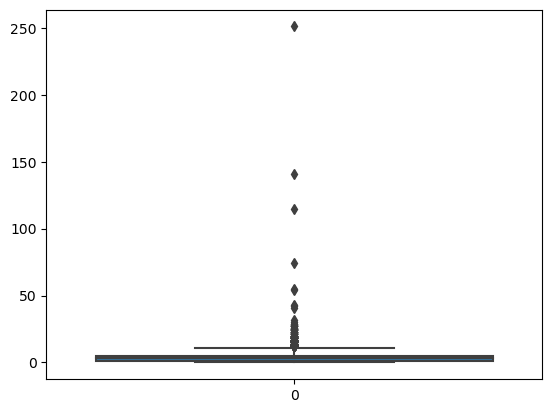

In [45]:
sns.boxplot(data=lead["TotalVisits"])

In [46]:
#Removing values above 90%:
quartile_total_visits = lead['TotalVisits'].quantile(0.99)
lead = lead[lead["TotalVisits"] < quartile_total_visits]

<Axes: >

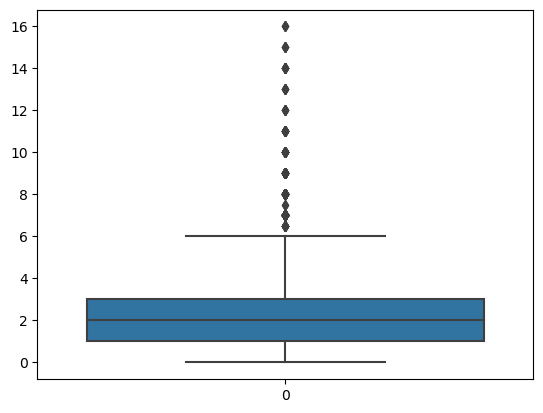

In [47]:
sns.boxplot(data=lead["Page Views Per Visit"])

In [48]:
#Removing values above 90%:
quartile_page_visits = lead['Page Views Per Visit'].quantile(0.99)
lead = lead[lead["Page Views Per Visit"] < quartile_page_visits]

<Axes: >

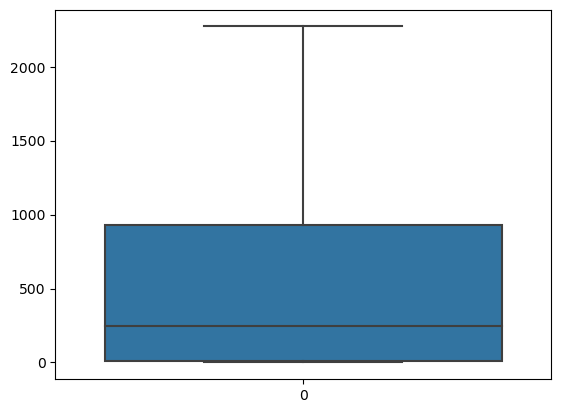

In [49]:
sns.boxplot(data=lead["Total Time Spent on Website"])

In [50]:
#Removing values above 90%:
quartile_total_time = lead['Total Time Spent on Website'].quantile(0.99)
lead = lead[lead["Total Time Spent on Website"] < quartile_total_time]

#### STEP-4: UNIVARIATE & BIVARIATE ANALYSIS

##### UNIVARIATE ANALYSIS

In [51]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not_specified,Unemployed,Interested in other courses,Mumbai,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Not_specified,Unemployed,Ringing,Mumbai,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not_specified,Unemployed,Will revert after reading the email,Mumbai,No


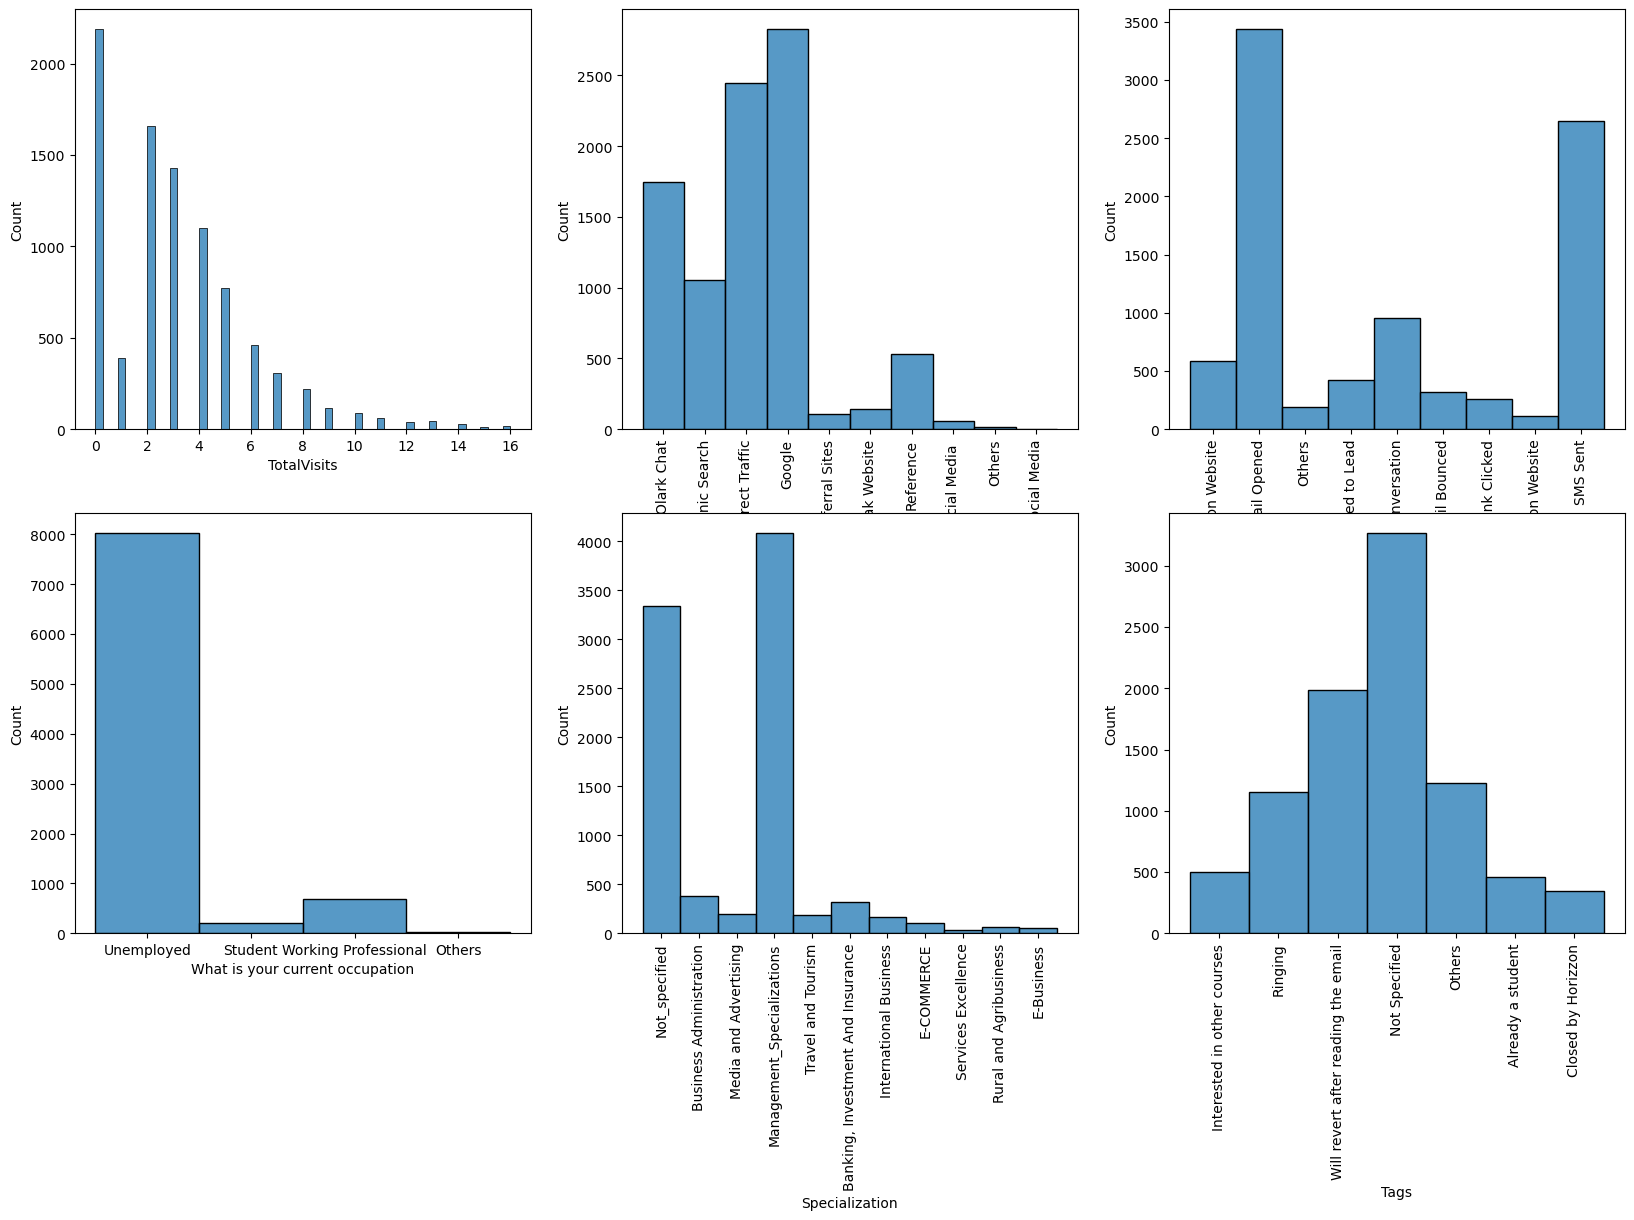

In [53]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
sns.histplot(lead["TotalVisits"])
plt.subplot(2, 3, 2)
sns.histplot(lead["Lead Source"])
plt.xticks(rotation=90)
plt.subplot(2, 3, 3)
sns.histplot(lead["Last Activity"])
plt.xticks(rotation=90)
plt.subplot(2, 3, 4)
sns.histplot(lead["What is your current occupation"])
plt.subplot(2, 3, 5)
sns.histplot(lead["Specialization"])
plt.xticks(rotation=90)
plt.subplot(2, 3, 6)
sns.histplot(lead["Tags"])
plt.xticks(rotation=90)
plt.show()

#### --> The following Observations were found from the above analysis:-
    1.Maximum frequency of total visits is in 0 visits.
    2.Majority of the Lead Source is from Google Search followed by Direct Traffic.
    3.SMS sent and Email Opened as their last activity has maximum leads.
    4.Maximum leads have occupation as Unemployed, and conversion rate of working professional is good. so it is important to focus on unemployed and working professionals. 
    Houswives have least leads.
    5.Not Specified has most no. of tags.

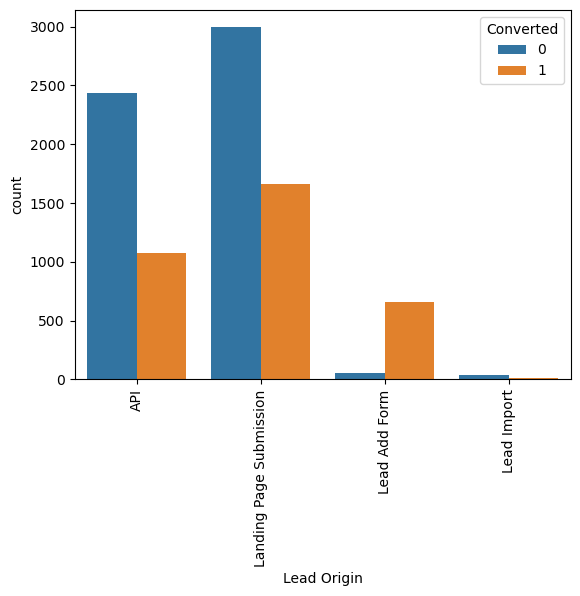

In [58]:
sns.countplot(x = lead["Lead Origin"], hue = lead["Converted"])
plt.xticks(rotation=90)
plt.show()

##### --> We can see that the Landing Page Submission has most converted rate followed by API.

In [62]:
lead.City.value_counts()

Mumbai                         6696
Thane & Outskirts               714
Other Cities                    664
Other Cities of Maharashtra     433
Other Metro Cities              361
Tier II Cities                   70
Name: City, dtype: int64

<Axes: xlabel='A free copy of Mastering The Interview', ylabel='count'>

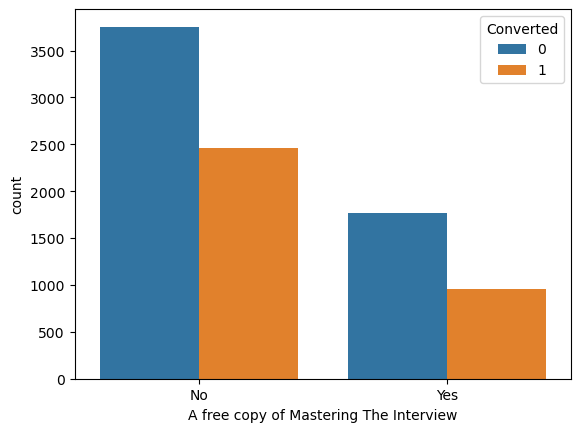

In [64]:
sns.countplot(x=lead["A free copy of Mastering The Interview"], hue=lead["Converted"])

##### -->It can be seen that the student who did not opt for the free copy of Mastering the Interview had the most likely rate to be converted.

##### BIVARIATE ANALYSIS`

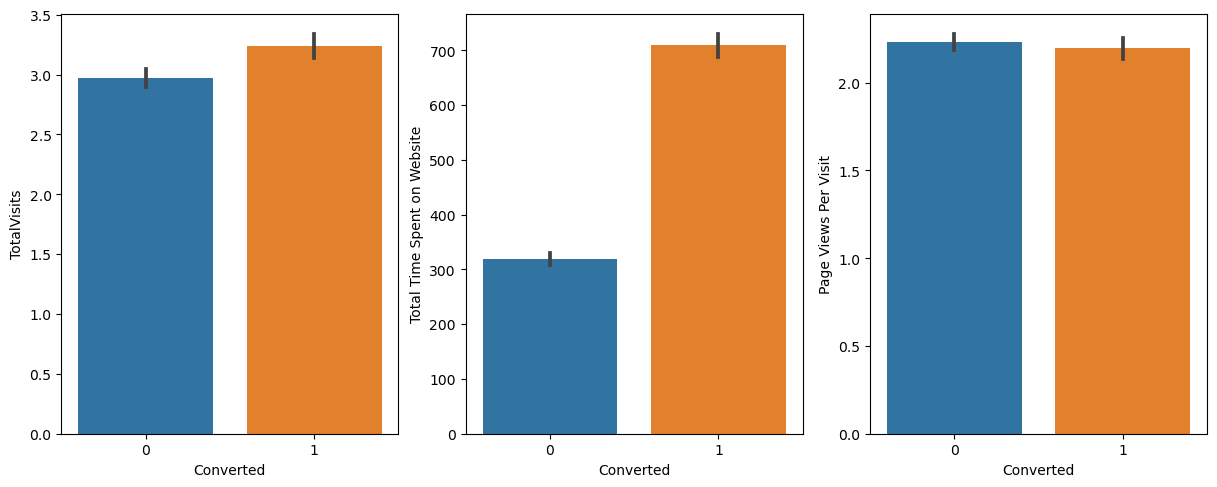

In [67]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.barplot(x='Converted', y='TotalVisits', data=lead)
plt.subplot(2, 4, 2)
sns.barplot(x='Converted', y='Total Time Spent on Website', data=lead)
plt.subplot(2, 4, 3)
sns.barplot(x='Converted', y='Page Views Per Visit', data=lead)
plt.show()

### The above graph shows following observations:
    1. People with more visits are more likely to be converted.
    2. People who spend more hours on the website are more likely to be converted.
    3. Both converted and non converted student have similar amount of page views per visit.

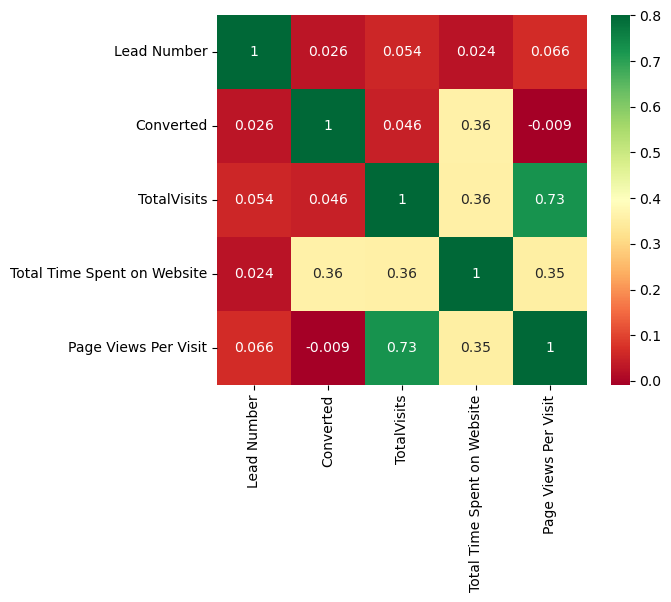

In [65]:
#heatmap
sns.heatmap(lead.corr(),cmap="RdYlGn",vmax=.8, annot=True, square = True)
plt.show()

##### --> The above graph shows following observations:
    1. Total Visits & Page views per visit have strong correlation btw each other.
    2. Total time spent on website and getting converted have positive correlation.
    3. Total visits and total time spent on website is also positive correlated.

#### STEP-5: DATA PREPARATION AND FEATURE SELECTION

In [ ]:
lead.head()

In [ ]:
# mapping columns

lead['A free copy of Mastering The Interview'] = lead['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes'else 0)

In [ ]:
# droping Prospect ID, lead Number as it has only unique numbers and characters

lead.drop(['Prospect ID','Lead Number'],1,inplace=True)
lead.head()

In [ ]:
lead.info()

In [ ]:
#Creating Dummy Variables for all Categorical Variable:
dummies_lead = pd.get_dummies(lead['Lead Origin'])
dummies_lead.head()

In [ ]:
lead_dummy = pd.get_dummies(lead['What is your current occupation'])

In [ ]:
lead_dummy = pd.get_dummies(lead['City'])

In [ ]:
lead_dummy1 =pd.get_dummies(lead['Last Activity'],prefix='Last Activity')
lead_dummy1 = lead_dummy1.drop(['Last Activity_Others'], axis=1)
lead_dummy1.head()

In [ ]:
lead_dummy2=pd.get_dummies(lead['Lead Source'],prefix='Lead Source')
lead_dummy2 = lead_dummy2.drop(['Lead Source_Others'], axis=1)
lead_dummy2.head()

In [ ]:
lead_dummy3=pd.get_dummies(lead['Specialization'],prefix='Specialization')
lead_dummy3 = lead_dummy3.drop(['Specialization_Not_specified'], axis=1)
lead_dummy3.head()

In [ ]:
lead_dummy4=pd.get_dummies(lead['Tags'],prefix='Tags')
lead_dummy4 = lead_dummy4.drop(['Tags_Others'], axis=1)
lead_dummy4.head()

In [ ]:
#merging all variables in one dataframe:
lead = pd.concat([lead,lead_dummy,lead_dummy1,lead_dummy2,lead_dummy3,lead_dummy4],axis=1)
lead.head()

In [ ]:
#Dropping the Original Columns:
drop_cols=['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags'
          ,'City',]
lead.drop(drop_cols,axis=1,inplace=True)

In [ ]:
lead.shape

#### STEP-6: SPLIT THE DATA

In [ ]:
x = lead.drop('Converted',axis=1)
y = lead['Converted']
y.head()

In [ ]:
x.head()

In [ ]:
# Splitting the data into train and test :

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,test_size=0.3, random_state=100)

In [ ]:
#Rescaling the variables:
scaler = StandardScaler()
num_cols=x_train.select_dtypes(include=['float64','int64']).columns
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_train.head()

#### STEP-7: MODEL BUILDING AND EVALUATION

In [ ]:
#Building model with statsmodels and rfe:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(x_train, y_train)

In [ ]:
rfe.support_

In [ ]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
# list of RFE supported columns 

columns = x_train.columns[rfe.support_]
columns

In [ ]:
x_train.columns[~rfe.support_]

In [ ]:
# MODEL BUILDING-1

x_train_sm = sm.add_constant(x_train[columns])
logm1 = sm.GLM(y_train,x_train_sm,family = sm.families.Binomial())
res = logm1.fit()
res.summary()

##### -->Since all the variables have less p-value lets have a look at VIFs as well.

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x_train[columns].columns
vif['VIF'] = [variance_inflation_factor(x_train[columns].values,i) for i in range(x_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

##### --> The VIF score is also not that high so changes necessary

In [ ]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

In [ ]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

In [ ]:
#Checking Accuracy:
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

In [ ]:
TP = confusion[1,1] # true positives
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Lets see the sensitivity of our logistic regression model
TP/float(TP+FN)

In [ ]:
# Lets see the specificity 
TN/float(TN+FP)

In [ ]:
# Calculate False Positive Rate - predicting conversion when customer does not have convert
print(FP/float(TN+FP))

In [ ]:
# positive predictive value
print(TP/float(TP+FP))

In [ ]:
# negative predictive value 
print(TN/float(TN+FN))

##### PLOTTING ROC CURVE

In [ ]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' %auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_prob,drop_intermediate=False)

In [ ]:
#Drawing Curve:-
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Converted_prob)

##### We are getting 0.96 which is close to 1.

##### Finding optimal cutoff point:-

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_lead = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_lead.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_lead)

In [ ]:
# Lets plot accuracy , sensitivity and specificity for various probabilities.

cutoff_lead.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show

In [ ]:
#### From the above curve, 0.3 is the optimum point to take it as a cutoff probability.


In [ ]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

In [ ]:
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Lead Number','Final_Predicted','Lead Score']].head()

In [ ]:
# Lets check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Final_Predicted))

In [ ]:
confusion_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
confusion_1

In [ ]:
TP = confusion_1[1,1] # true positives
TN = confusion_1[0,0] # true negatives
FP = confusion_1[0,1] # false positives
FN = confusion_1[1,0] # false negatives

In [ ]:
# Lets see the sensitivity of our logistic regression model
TP/float(TP+FN)

In [ ]:
# Lets see the specificity 
TN/float(TN+FP)

##### The Following observations could be found from the model:

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.96, which is good. We have the following values for the Train Data:
Accuracy : 89.80%
Sensitivity : 88.81%
Specificity : 90.40%

In [ ]:
# Calculate False Positive Rate - predicting conversion when customer does not have convert
print(FP/float(TN+FP))

In [ ]:
# positive predictive value
print(TP/float(TP+FP))

In [ ]:
# negative predictive value 
print(TN/float(TN+FN))

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Final_Predicted)
print(confusion)

In [ ]:
#### Precision
TP/TP+FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

In [ ]:
#### Recall
TP/TP+FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

In [ ]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.Final_Predicted)

In [ ]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.Final_Predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_prob)

In [ ]:
plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-")
plt.show()

In [ ]:
# Scaling test set
num_cols = x_test.select_dtypes(include=['float64','int64']).columns
x_test[num_cols] = scaler.fit_transform(x_test[num_cols])
x_test.head()

In [ ]:
x_test = x_test[columns]
x_test.head()

In [ ]:
x_test_sm = sm.add_constant(x_test)

##### Making Predictions on the TEST Set

In [ ]:
y_test_pred = res.predict(x_test_sm)

In [ ]:
y_test_pred[:10]

In [ ]:
# Converting y_pred into DataFrame
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

In [ ]:
# Converting y_test into DataFrame
y_test_df =pd.DataFrame(y_test)

In [ ]:
# Putting Lead Number to Index
y_test_df['Lead Number'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side
y_pred.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [ ]:
# Concating y_pred and y_test_df
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
# Renaming the column
y_pred_final = y_pred_final.rename(columns={0:'Converted_prob'})

In [ ]:
y_pred_final.head()

In [ ]:
# Rearranging the columns 
y_pred_final = y_pred_final[['Lead Number','Converted','Converted_prob']]
y_pred_final['Lead Score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))

In [ ]:
y_pred_final.head()

In [ ]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
# Lets check the overall accuracy.
print(metrics.accuracy_score(y_pred_final.Converted,y_pred_final.Final_Predicted))

In [ ]:
confusion_1 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted)
confusion_1

In [ ]:
TP = confusion_1[1,1] # true positives
TN = confusion_1[0,0] # true negatives
FP = confusion_1[0,1] # false positives
FN = confusion_1[1,0] # false negatives

In [ ]:
# Lets see the sensitivity of our logistic regression model
TP/float(TP+FN)

In [ ]:
# Lets see the specificity 
TN/float(TN+FP)

In [ ]:
precision_score(y_pred_final.Converted , y_pred_final.Final_Predicted)

In [ ]:
recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

#### Observations on test set:

##### After running the model on the Test Data these are the outcomes we obtain:
Accuracy : 89.33%
Sensitivity : 88.14%
Specificity : 90.09%

### Final Observation:

##### Comparing the values obtained for Train and Test Sets.

### Train Data :

#### Accuracy : 89.80%
#### Sensitivity : 88.81%
#### Specificity : 90.40%

### Test Data :

#### Accuracy : 89.3%
#### Sensitivity : 88.14%
#### Specificity : 90.09%

#### THIS MODEL SHOWS GOOD CONVERSION RATE AND THE CEO OF THE X COMPANY WOULD BE ABLE TO MAKE DECISIONS BASED ON THESE INFORMATIONS

##### XXX-------XXX